# Testing Azure Face API

## Import

In [6]:
import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

## Setup

In [2]:
subscription_key = 'dd09200b03b54ab58a6ea35fd000b56d'
assert subscription_key

face_api_url = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'

image_url = 'https://upload.wikimedia.org/wikipedia/commons/3/37/Dagestani_man_and_woman.jpg'

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

## Plot downloaded image

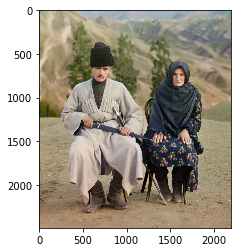

In [4]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

## Request Face API

In [9]:
response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
# print(json.dumps(response.json()))
faces = response.json()
faces[0]['faceRectangle']

{'height': 195, 'left': 616, 'top': 621, 'width': 195}

In [17]:
faces[1]

{'faceAttributes': {'accessories': [],
  'age': 56.0,
  'blur': {'blurLevel': 'high', 'value': 0.83},
  'emotion': {'anger': 0.0,
   'contempt': 0.001,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 0.003,
   'neutral': 0.984,
   'sadness': 0.011,
   'surprise': 0.0},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.41},
  'facialHair': {'beard': 0.0, 'moustache': 0.0, 'sideburns': 0.0},
  'gender': 'female',
  'glasses': 'NoGlasses',
  'hair': {'bald': 0.06,
   'hairColor': [{'color': 'black', 'confidence': 0.99},
    {'color': 'gray', 'confidence': 0.89},
    {'color': 'other', 'confidence': 0.64},
    {'color': 'brown', 'confidence': 0.34},
    {'color': 'blond', 'confidence': 0.07},
    {'color': 'red', 'confidence': 0.03}],
   'invisible': False},
  'headPose': {'pitch': 0.0, 'roll': 2.0, 'yaw': -2.2},
  'makeup': {'eyeMakeup': False, 'lipMakeup': False},
  'noise': {'noiseLevel': 'high', 'value': 0.76},
  'occlusion': {'eyeOccluded': False,
   'foreheadOccluded': Fa

[616, 621]
[195, 195]
[1503, 693]
[180, 180]


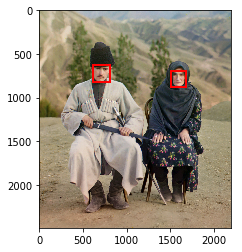

In [15]:
fig,ax = plt.subplots(1)
ax.imshow(img)
rect_coords = [[face['faceRectangle']['left'], face['faceRectangle']['top']] for face in faces]
rect_sizes = [[face['faceRectangle']['width'], face['faceRectangle']['height']] for face in faces]
for i in range(len(faces)):
    coord = rect_coords[i]
    size = rect_sizes[i]
    print (coord)
    print (size)
    rect_patch = patches.Rectangle((coord[0],coord[1]),size[0],size[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect_patch)

## Try using local data

In [24]:
ex_img = open('../data/example_images/001.jpg', 'rb')
headers = { 'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'}
response = requests.post(face_api_url , headers=headers, data=ex_img, params=params)
faces = response.json()

In [25]:
faces[0]

{'faceAttributes': {'accessories': [],
  'age': 36.0,
  'blur': {'blurLevel': 'medium', 'value': 0.63},
  'emotion': {'anger': 0.001,
   'contempt': 0.006,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 0.0,
   'neutral': 0.981,
   'sadness': 0.012,
   'surprise': 0.0},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.58},
  'facialHair': {'beard': 0.1, 'moustache': 0.1, 'sideburns': 0.1},
  'gender': 'male',
  'glasses': 'NoGlasses',
  'hair': {'bald': 0.01,
   'hairColor': [{'color': 'brown', 'confidence': 1.0},
    {'color': 'black', 'confidence': 0.69},
    {'color': 'gray', 'confidence': 0.44},
    {'color': 'blond', 'confidence': 0.23},
    {'color': 'red', 'confidence': 0.13},
    {'color': 'other', 'confidence': 0.05}],
   'invisible': False},
  'headPose': {'pitch': 0.0, 'roll': -6.0, 'yaw': -13.2},
  'makeup': {'eyeMakeup': False, 'lipMakeup': False},
  'noise': {'noiseLevel': 'low', 'value': 0.0},
  'occlusion': {'eyeOccluded': False,
   'foreheadOccluded': Fal

[250, 183]
[191, 191]


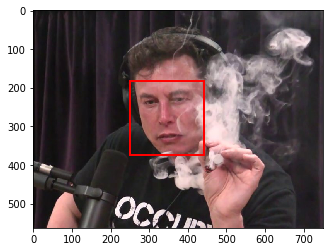

In [26]:
img = Image.open('../data/example_images/001.jpg')
fig,ax = plt.subplots(1)
ax.imshow(img)
rect_coords = [[face['faceRectangle']['left'], face['faceRectangle']['top']] for face in faces]
rect_sizes = [[face['faceRectangle']['width'], face['faceRectangle']['height']] for face in faces]
for i in range(len(faces)):
    coord = rect_coords[i]
    size = rect_sizes[i]
    print (coord)
    print (size)
    rect_patch = patches.Rectangle((coord[0],coord[1]),size[0],size[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect_patch)

In [27]:
ex_img = open('../data/example_images/002.jpg', 'rb')
headers = { 'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'}
response = requests.post(face_api_url , headers=headers, data=ex_img, params=params)
faces = response.json()

In [28]:
faces[0]

{'faceAttributes': {'accessories': [],
  'age': 34.0,
  'blur': {'blurLevel': 'medium', 'value': 0.5},
  'emotion': {'anger': 0.0,
   'contempt': 0.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 0.017,
   'neutral': 0.0,
   'sadness': 0.983,
   'surprise': 0.0},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.63},
  'facialHair': {'beard': 0.1, 'moustache': 0.1, 'sideburns': 0.1},
  'gender': 'male',
  'glasses': 'NoGlasses',
  'hair': {'bald': 0.19,
   'hairColor': [{'color': 'blond', 'confidence': 0.99},
    {'color': 'gray', 'confidence': 0.91},
    {'color': 'brown', 'confidence': 0.66},
    {'color': 'other', 'confidence': 0.13},
    {'color': 'red', 'confidence': 0.08},
    {'color': 'black', 'confidence': 0.04}],
   'invisible': False},
  'headPose': {'pitch': 0.0, 'roll': 12.8, 'yaw': 21.3},
  'makeup': {'eyeMakeup': False, 'lipMakeup': False},
  'noise': {'noiseLevel': 'low', 'value': 0.16},
  'occlusion': {'eyeOccluded': False,
   'foreheadOccluded': False,


[175, 108]
[220, 220]


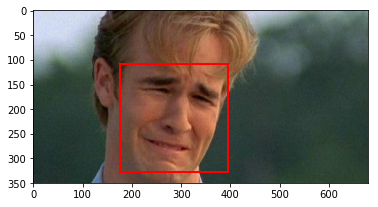

In [29]:
img = Image.open('../data/example_images/002.jpg')
fig,ax = plt.subplots(1)
ax.imshow(img)
rect_coords = [[face['faceRectangle']['left'], face['faceRectangle']['top']] for face in faces]
rect_sizes = [[face['faceRectangle']['width'], face['faceRectangle']['height']] for face in faces]
for i in range(len(faces)):
    coord = rect_coords[i]
    size = rect_sizes[i]
    print (coord)
    print (size)
    rect_patch = patches.Rectangle((coord[0],coord[1]),size[0],size[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect_patch)

In [30]:
ex_img = open('../data/example_images/003.jpg', 'rb')
headers = { 'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'}
response = requests.post(face_api_url , headers=headers, data=ex_img, params=params)
faces = response.json()

In [31]:
faces[0]

{'faceAttributes': {'accessories': [],
  'age': 49.0,
  'blur': {'blurLevel': 'medium', 'value': 0.57},
  'emotion': {'anger': 0.0,
   'contempt': 0.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 1.0,
   'neutral': 0.0,
   'sadness': 0.0,
   'surprise': 0.0},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.55},
  'facialHair': {'beard': 0.1, 'moustache': 0.1, 'sideburns': 0.1},
  'gender': 'male',
  'glasses': 'NoGlasses',
  'hair': {'bald': 0.07,
   'hairColor': [{'color': 'black', 'confidence': 0.99},
    {'color': 'brown', 'confidence': 0.94},
    {'color': 'gray', 'confidence': 0.58},
    {'color': 'other', 'confidence': 0.25},
    {'color': 'blond', 'confidence': 0.03},
    {'color': 'red', 'confidence': 0.03}],
   'invisible': False},
  'headPose': {'pitch': 0.0, 'roll': 6.5, 'yaw': -20.1},
  'makeup': {'eyeMakeup': False, 'lipMakeup': False},
  'noise': {'noiseLevel': 'low', 'value': 0.0},
  'occlusion': {'eyeOccluded': False,
   'foreheadOccluded': False,
   '

[349, 211]
[413, 413]


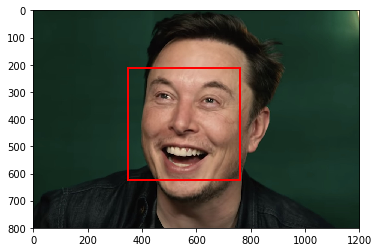

In [32]:
img = Image.open('../data/example_images/003.jpg')
fig,ax = plt.subplots(1)
ax.imshow(img)
rect_coords = [[face['faceRectangle']['left'], face['faceRectangle']['top']] for face in faces]
rect_sizes = [[face['faceRectangle']['width'], face['faceRectangle']['height']] for face in faces]
for i in range(len(faces)):
    coord = rect_coords[i]
    size = rect_sizes[i]
    print (coord)
    print (size)
    rect_patch = patches.Rectangle((coord[0],coord[1]),size[0],size[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect_patch)